# 2D Preprocessing the GlobColour Dataset 
* prepare dataset for LDS-fitting:
   * load all 5 variables and merge (interpolate) with the float dataset
   * load the distance to coast and merge (interpolate) with the float dataset
   * output the data on disk
   * (plan)if needed, split Nov-Dec, encoding the weekly number

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from dask.diagnostics import ProgressBar
import seaborn as sns
from matplotlib.colors import LogNorm

In [2]:
# resampling frequency in number of days
freq=2

              id        time        lat        lon       temp         ve  \
2740       10206  2002-07-04  16.229625  66.330375        NaN  13.064500   
5480       10208  2002-07-04  13.891875  69.552375        NaN   8.505125   
8220       11089  2002-07-04  16.354375  64.683750  27.954125  12.168000   
10960      15703  2002-07-04  13.903250  69.583125  28.552250   8.685875   
16440      27069  2002-07-04  20.169750  68.737500  29.012000  26.958750   
21920      28842  2002-07-04  18.878875  60.694625  27.701750  10.499125   
24660      34159  2002-07-04  12.548125  58.914250        NaN  27.354250   
30140      34210  2002-07-04   6.476750  56.925000  26.694875  -9.666750   
32880      34211  2002-07-04   8.602375  67.929125  28.278000  20.618125   
35620      34212  2002-07-04   6.232000  64.750250  28.470750  14.641875   
57540      34708  2002-07-04  10.167500  59.691500  27.185500  47.792000   
63020      34710  2002-07-04  12.933625  49.905250  30.910625 -34.754625   
65760      3

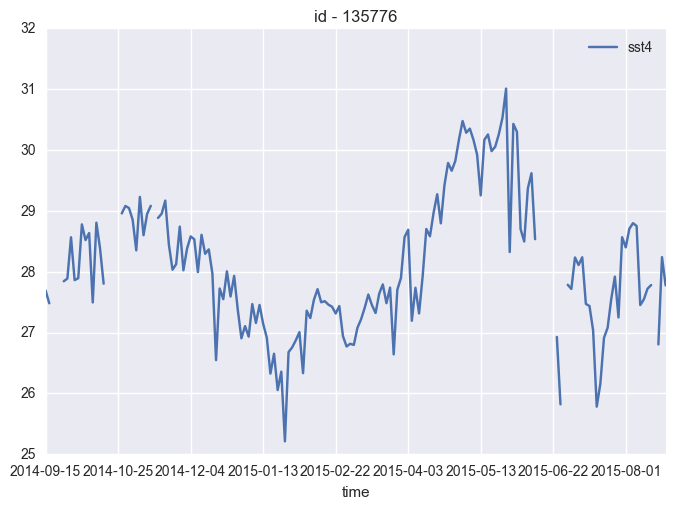

In [32]:
# load preprocessed float data, and start the interpolation right here!!!!
var6 = "sst4"
var5 = "par"
var4 = "t865"
var3 = "kd490"
var2 = "cdm"
var1 = "chl"
vardist = "dist"

indir_prefix = "../data_collector_globcolour/output.data.interpolate/2017GDPfloat/" + "df_Globcolor_"
indir = indir_prefix + var1 + vardist + var2 + var3 + var4 + var5 + var6 + "_" + str(freq) + "d.csv"

floatDF_tmp = pd.read_csv(indir,index_col=0)
print(floatDF_tmp)


### plot for id 125776, which will be fit by LDS
plt.figure(figsize=(8,6))
floatDF_tmp[floatDF_tmp .id == 135776].plot(x='time', y ='sst4', title=('id - %d' % 135776) )
plt.show();
plt.close("all")


# Calculation of the Lagrangian rate of change of the chlor-a concentration

In [ ]:
# task 1 -- columns add to the data frame, 
#           chlor-a on the log-scale 
#           rate of chlor-a
#           rate of log-scale chlor-a
#           nondimensionalization => rescale rates into daily and weekly rates
#           standarization of daily rates

#output???

# task 2 -- spatial plots on the chl_rate


#
# no need to add week number at this step? or add week number at this step and subset it later?

#
# no need to reduce the dataset to Nov-March? or reduce the dataset at this step

#
#  task 3 -- reduce and plot the rate here?

In [47]:
# https://stackoverflow.com/questions/16780014/import-file-from-parent-directory
# https://stackoverflow.com/questions/16771894/python-nameerror-global-name-file-is-not-defined
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))

from tools import chl_rates  # del(chl_rates)
import importlib
importlib.reload(chl_rates)

print("\n ******* \[\]The Multilinear Interpolation Approach for %dD resampling******* \n" % (freq))



 ******* \[\]The Multilinear Interpolation Approach for 2D resampling******* 



In [48]:
floatsDF_ChlRate = chl_rates.add_chl_rates_globcolour(floatDF_tmp, freq)


 ******* Take the Diff of chlor_a ******* 


 *** the resampling freqency used for nondimensionalization is 2D *** 

check the sum of the chlor_a_rate before the merge 35.40582932227814
check the sum of the chlor_a_rate after the merge 35.40582932227814
check the sum of the chlor_a_log_e_rate before the merge -55.23161675086747
check the sum of the chlor_a_log_e_rate after the merge -55.23161675086747

 ******* 
 summary of the rate of change of chlor_a 
 count    7114.000000
mean        0.004977
std         0.935299
min       -16.659540
25%        -0.016032
50%        -0.001496
75%         0.011979
max        15.917828
Name: chl_rate, dtype: float64

 ******* 
 summary of the rate of change of log-scale chlor-a 
 count    7114.000000
mean       -0.007764
std         0.197654
min        -1.771734
25%        -0.083692
50%        -0.009153
75%         0.066157
max         2.063741
Name: chl_log_e_rate, dtype: float64
             id        time        lat        lon       temp         v